C:\Users\Ritesh\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Ritesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ritesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


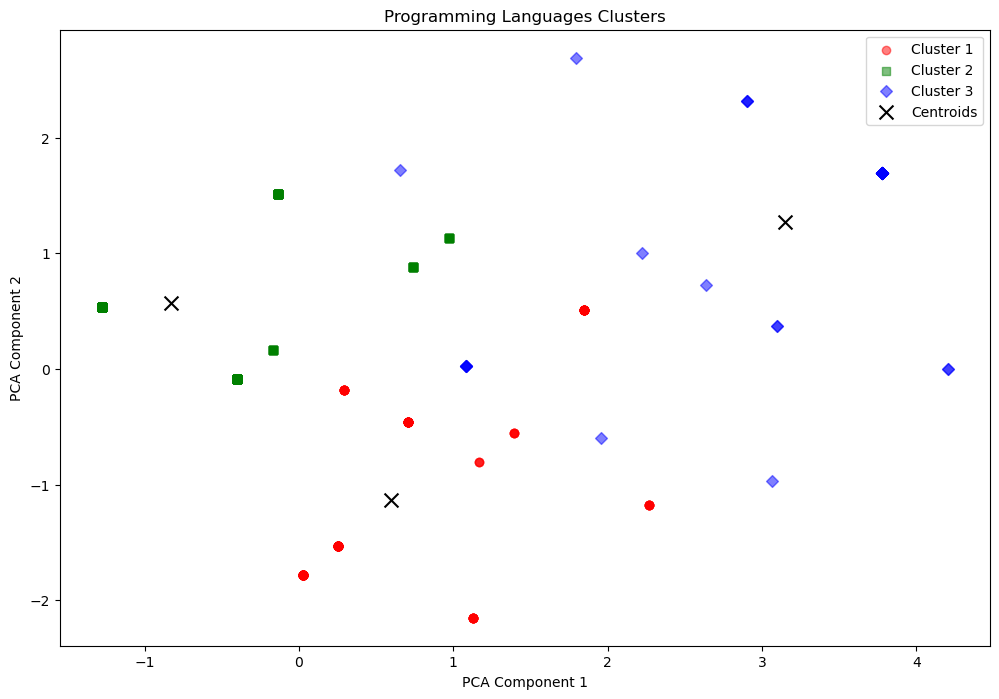


Cluster 1 Most Common Programming Languages:
Python: 136
Java: 127
JavaScript: 52
C/C++: 51

Cluster 2 Most Common Programming Languages:
C/C++: 312
Python: 58
JavaScript: 56
Java: 23

Cluster 3 Most Common Programming Languages:
Angular JS: 43
JavaScript: 34
Python: 32
Java: 32
C/C++: 31

Cluster Centers (in original feature space):

Cluster 1 center:
Top 10 features: java, python, javascript, angular js, c/c++

Cluster 2 center:
Top 10 features: c/c++, javascript, angular js, python, java

Cluster 3 center:
Top 10 features: angular js, javascript, java, python, c/c++


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter

# Load the CSV data into a DataFrame
df = pd.read_csv('college.csv')

# Drop any rows with missing values if necessary
df = df.dropna()

# Extract the column with programming languages
programming_languages = df['Which Programming Languages are you Proficient in?']

# Use CountVectorizer to convert the text data into a matrix of token counts
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(';'))
X = vectorizer.fit_transform(programming_languages)

# Convert to array and normalize the data
X_array = X.toarray()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_array)

# Use K-Means to create clusters
num_clusters = 3  # Change this number based on your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

# Reduce the data to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']
for cluster in range(num_clusters):
    cluster_data = X_pca[df['Cluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                color=colors[cluster], marker=markers[cluster], 
                label=f'Cluster {cluster + 1}', alpha=0.5)

# Plot the cluster centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            color='black', marker='x', s=100, label='Centroids')

plt.title('Programming Languages Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Print the most common programming languages for each cluster
for cluster in range(num_clusters):
    cluster_languages = df[df['Cluster'] == cluster]['Which Programming Languages are you Proficient in?'].str.split(';').explode()
    common_languages = Counter(cluster_languages).most_common(10)  # Get top 10 languages
    print(f"\nCluster {cluster + 1} Most Common Programming Languages:")
    for language, count in common_languages:
        print(f"{language}: {count}")

# Print the cluster centers (in original feature space)
print("\nCluster Centers (in original feature space):")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"\nCluster {i + 1} center:")
    sorted_indices = center.argsort()[::-1]
    top_features = [vectorizer.get_feature_names_out()[index] for index in sorted_indices[:10]]
    print(f"Top 10 features: {', '.join(top_features)}")
